<a href="https://colab.research.google.com/github/RasaRaj/ANN/blob/main/MobileNet%20Model/MobileNet_Transfer_Learning_Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
print(tf.__version__)
     

2.12.0


In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
fid = drive.ListFile({'q':"title='Final_datateset_for_Image.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('Final_datateset_for_Image.zip')
f.keys()
!unzip Final_datateset_for_Image.zip

Streaming output truncated to the last 5000 lines.
  inflating: Final datateset for Image/validation/happy/15767.jpg  
  inflating: Final datateset for Image/validation/happy/15791.jpg  
  inflating: Final datateset for Image/validation/happy/15843.jpg  
  inflating: Final datateset for Image/validation/happy/15854.jpg  
  inflating: Final datateset for Image/validation/happy/15885.jpg  
  inflating: Final datateset for Image/validation/happy/15910.jpg  
  inflating: Final datateset for Image/validation/happy/15966.jpg  
  inflating: Final datateset for Image/validation/happy/15976.jpg  
  inflating: Final datateset for Image/validation/happy/15983.jpg  
  inflating: Final datateset for Image/validation/happy/16037.jpg  
  inflating: Final datateset for Image/validation/happy/16042.jpg  
  inflating: Final datateset for Image/validation/happy/16064.jpg  
  inflating: Final datateset for Image/validation/happy/16076.jpg  
  inflating: Final datateset for Image/validation/happy/16081.jpg

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import Model
from keras.layers.serialization import activation
import numpy as np
     

In [ ]:
train_dir = '/content/Final datateset for Image/train'
validation_dir = '/content/Final datateset for Image/validation'

In [ ]:
# preprocessing

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.4)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224,224),
                                                    batch_size=50,
                                                    class_mode ='categorical',
                                                    subset='training')

Found 17514 images belonging to 13 classes.


In [ ]:

test_generator = train_datagen.flow_from_directory(validation_dir,
                                                   target_size=(224,224),
                                                   batch_size=50,
                                                   class_mode='categorical',
                                                   subset='validation')

Found 2939 images belonging to 13 classes.


In [ ]:
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from glob import glob

In [ ]:
base_model = keras.applications.MobileNetV2(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False,
)

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
x=Flatten()(base_model.output)
prediction=Dense(13, activation= 'softmax')(x)
model=Model(inputs=base_model.input, outputs=prediction)
model.summary()
     

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(train_generator,epochs=25)

Epoch 1/25
351/351 [==============================] - 199s 533ms/step - loss: 6.6104 - accuracy: 0.3044
Epoch 2/25
351/351 [==============================] - 186s 530ms/step - loss: 5.7875 - accuracy: 0.3672
Epoch 3/25
351/351 [==============================] - 185s 528ms/step - loss: 5.8408 - accuracy: 0.3933
Epoch 4/25
351/351 [==============================] - 186s 530ms/step - loss: 5.8570 - accuracy: 0.4163
Epoch 5/25
351/351 [==============================] - 184s 523ms/step - loss: 5.8360 - accuracy: 0.4324
Epoch 6/25
351/351 [==============================] - 187s 534ms/step - loss: 5.7810 - accuracy: 0.4448
Epoch 7/25
351/351 [==============================] - 185s 528ms/step - loss: 5.6458 - accuracy: 0.4586
Epoch 8/25
351/351 [==============================] - 184s 525ms/step - loss: 5.6842 - accuracy: 0.4628
Epoch 9/25
351/351 [==============================] - 188s 534ms/step - loss: 5.6359 - accuracy: 0.4761
Epoch 10/25
351/351 [==============================] - 185s 528m

Accuracy:  0.5476190447807312


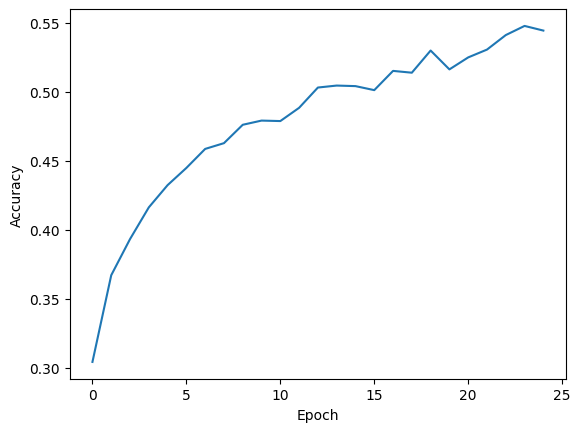

In [ ]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
print("Accuracy: ",max(history.history['accuracy']))
plt.show()

In [ ]:
#Testing

from tensorflow.keras.preprocessing import image
import numpy as np

img_pred=image.load_img("/content/Final datateset for Image/validation/sad/350.jpg",target_size=(224,224))
img_pred = np.expand_dims(img_pred, axis=0)
result = model.predict(img_pred)

print(result)
     

1/1 [==============================] - 0s 37ms/step
[[9.83176470e-01 0.00000000e+00 8.52629540e-08 9.16020945e-05
  1.00635536e-19 0.00000000e+00 1.36150730e-20 1.67206153e-02
  2.14609218e-18 0.00000000e+00 0.00000000e+00 1.12634189e-05
  3.19992235e-20]]


In [ ]:
if result[0][0]>result[0][1]:
  prediction = "sad"

else:
  prediction = "natural"


print(prediction)

sad
